In [24]:
# Javaria Ahmad
# 3001059
# The goal of this project is to build clustering model to find similar movies. K-means clustering is used here.
# References: Pluralsight.com

# imports

import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import preprocessing


import time
import random

import warnings
warnings.filterwarnings("ignore")

In [25]:
# Load into dataframes

df_links=pd.read_csv('../data/raw/ml-latest-small/links.csv')
df_movies=pd.read_csv('../data/raw/ml-latest-small/movies.csv')
df_ratings=pd.read_csv('../data/raw/ml-latest-small/ratings.csv')
df_tags=pd.read_csv('../data/raw/ml-latest-small/tags.csv')

type(df_links)
type(df_movies)
type(df_ratings)
type(df_tags)


pandas.core.frame.DataFrame

In [26]:
# Combine the datasets on Movie Id.

dfs = [df_movies, df_ratings, df_tags]
df_merge = reduce(lambda left,right: pd.merge(left,right,on='movieId'), dfs)

In [27]:
# Drop unnecessary columns

df_merge.drop(['userId_x','userId_y','timestamp_x','timestamp_y'], 'columns', inplace=True)
df_merge.head(5)

,movieId,title,genres,rating,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,fun
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,pixar
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,pixar


In [28]:
# Finding the count of missing values

df_merge[df_merge.isnull().any(axis=1)].count()

movieId    0
title      0
genres     0
rating     0
tag        0
dtype: int64

In [29]:
# Shuffle the dataset

df_merge = df_merge.sample(frac=1).reset_index(drop=True)
df_merge.head(5)

,movieId,title,genres,rating,tag
0,2,Jumanji (1995),Adventure|Children|Fantasy,4.0,Robin Williams
1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,5.0,monologue
2,1732,"Big Lebowski, The (1998)",Comedy|Crime,3.0,Highly quotable
3,1059,William Shakespeare's Romeo + Juliet (1996),Drama|Romance,3.0,shakespeare
4,288,Natural Born Killers (1994),Action|Crime|Thriller,2.0,controversial


In [30]:
# K-Means Clustering

# Convert tag to numeric values

label_encoding = preprocessing.LabelEncoder()
df_merge['tag'] = label_encoding.fit_transform(df_merge['tag'].astype(str))

In [31]:
df_merge.head()

,movieId,title,genres,rating,tag
0,2,Jumanji (1995),Adventure|Children|Fantasy,4.0,442
1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,5.0,1154
2,1732,"Big Lebowski, The (1998)",Comedy|Crime,3.0,228
3,1059,William Shakespeare's Romeo + Juliet (1996),Drama|Romance,3.0,1370
4,288,Natural Born Killers (1994),Action|Crime|Thriller,2.0,782


In [32]:
# Replace rating values in a group by its mean and replace tag values in a group by its mean. Drop duplicates.

df_merge['rating'] = df_merge.groupby(['movieId'])['rating'].transform('mean')
df_merge['tag'] = df_merge.groupby(['movieId'])['tag'].transform('mean')
df_merge = df_merge.drop_duplicates()
df_merge.head(20)

,movieId,title,genres,rating,tag
0,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,846.750000
1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,963.353591
2,1732,"Big Lebowski, The (1998)",Comedy|Crime,3.924528,806.406250
3,1059,William Shakespeare's Romeo + Juliet (1996),Drama|Romance,3.722222,742.600000
4,288,Natural Born Killers (1994),Action|Crime|Thriller,3.233696,1062.166667
6,4878,Donnie Darko (2001),Drama|Mystery|Sci-Fi|Thriller,3.981651,1147.931034
7,293,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,4.018797,816.171429
9,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,933.666667
10,6874,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller,3.961832,1219.000000
11,40815,Harry Potter and the Goblet of Fire (2005),Adventure|Fantasy|Thriller|IMAX,3.816901,441.000000


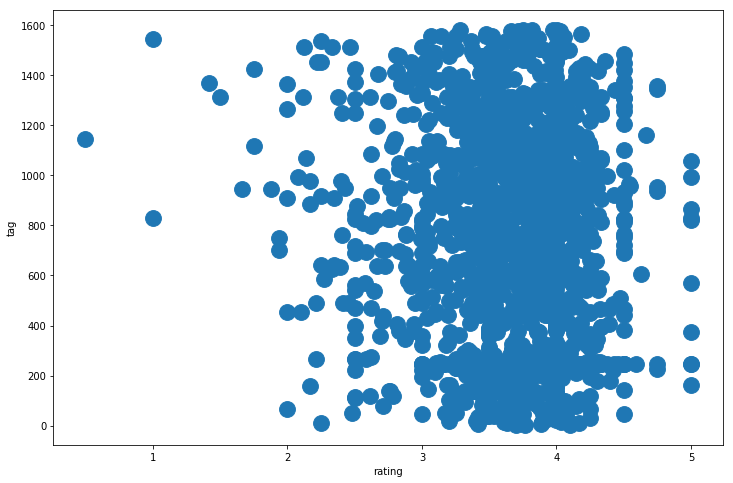

In [33]:
# Plot of original data points

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(df_merge['rating'], df_merge['tag'], s=250)
plt.xlabel('rating')
plt.ylabel('tag')
plt.show()

In [34]:
# Performing clustering on two features.

df_RatingTag = df_merge[['rating', 'tag']]
df_RatingTag = np.array(df_RatingTag)

kmeans_model_2D = KMeans(n_clusters=5, max_iter=1000).fit(df_RatingTag)

In [35]:
# Labels assigned by K-Means representing clusters.
kmeans_model_2D.labels_



array([4, 2, 4, ..., 4, 1, 0])

In [36]:
# Coordinates of cluster centers

centroids_2D = kmeans_model_2D.cluster_centers_
centroids_2D

array([[   3.63005551,  512.40477045],
       [   3.56582028, 1381.03758242],
       [   3.69264261, 1039.43624861],
       [   3.71464113,  196.05896318],
       [   3.63614008,  782.62858149]])

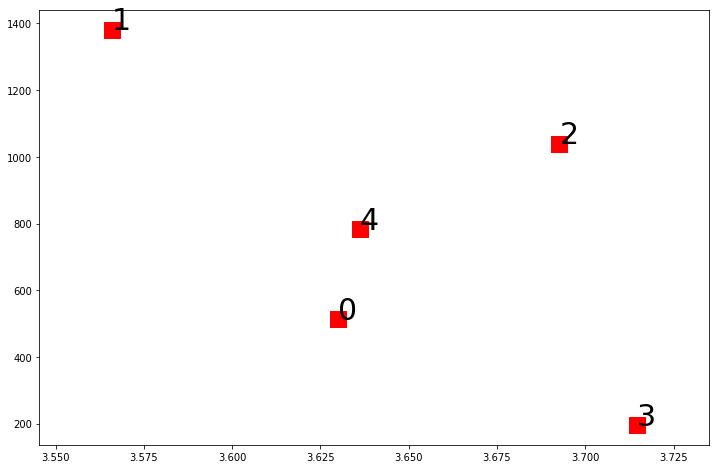

In [37]:
# Scatter plot of the centroids of five clusters

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')

for i in range(len(centroids_2D)):
    plt.annotate(i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=30)

In [38]:
# Cluster scores of the model. Silhouette score is pretty good.

df_labels = df_merge['tag']

print("Homogeneity score", metrics.homogeneity_score(df_labels, kmeans_model_2D.labels_))
print("Completeness score", metrics.completeness_score(df_labels, kmeans_model_2D.labels_))
print("V measure score", metrics.v_measure_score(df_labels, kmeans_model_2D.labels_))
print("Adjusted rand score", metrics.adjusted_rand_score(df_labels, kmeans_model_2D.labels_))
print("Adjusted mutal info score", metrics.adjusted_mutual_info_score(df_labels, kmeans_model_2D.labels_))
print("Silhouette score", metrics.silhouette_score(df_RatingTag, kmeans_model_2D.labels_))


('Homogeneity score', 0.249350005953036)
('Completeness score', 0.9999999999999999)
('V measure score', 0.3991675747627271)
('Adjusted rand score', 0.039003847081421225)
('Adjusted mutal info score', 0.09905995288071233)
('Silhouette score', 0.5743253418484019)


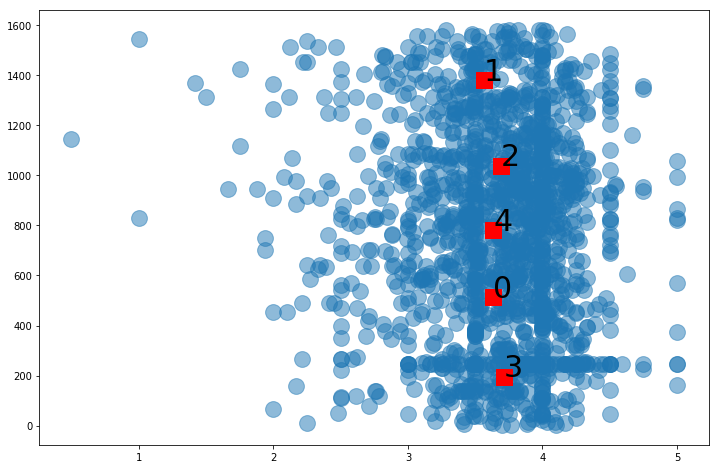

In [39]:
# Visualize original data points and centroids together in one plot.
# Clusters are somewhat well-formed.

colors = ['blue']
plt.figure(figsize = (12,8))
plt.scatter(df_merge['rating'], df_merge['tag'], s=250, cmap=matplotlib.colors.ListedColormap(colors),alpha=0.5)
plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')

for i in range(len(centroids_2D)):
    plt.annotate(i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=30)

In [40]:
# In conclusion, the clusters are somewhat well-formed in the plot above and the Silhouette score is pretty good.
# The combination of rating and tag helps in determining similar movies.